## Lab - 1

Name: Purusharth Malik

Registration No.: 2348542

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.interpolate import interp1d

# Loading a speech sample
sample_rate, signal = wavfile.read(r"C:\Users\purus\Downloads\tts_output_2.wav")
signal = signal / np.max(np.abs(signal))

### Implement sampling and quantization techniques for the given speech signals.

#### (a) Plot the time domain representation of the original speech signal.

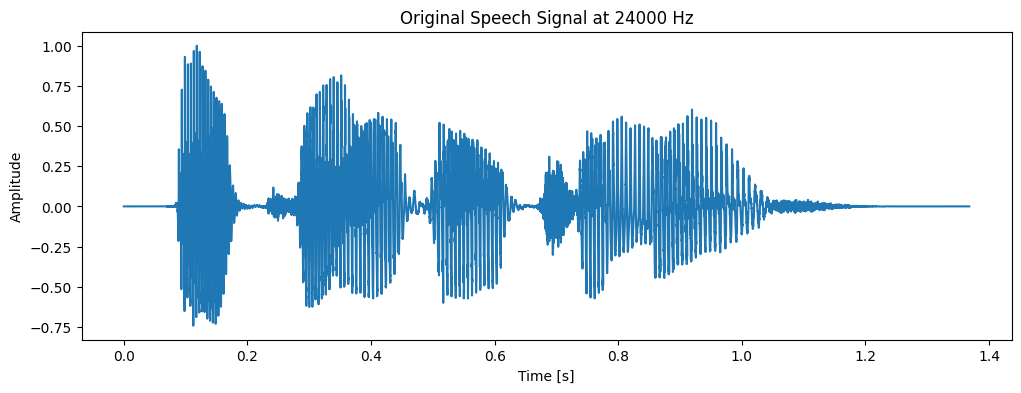

In [12]:
# Time vector for original signal
time_original = np.arange(len(signal)) / sample_rate

# Plot original signal
plt.figure(figsize=(12, 4))
plt.plot(time_original, signal)
plt.title(f'Original Speech Signal at {sample_rate} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

#### (b) Sample the speech signal at different sampling rates (e.g., 8kHz, 16kHz, and 44.1kHz).

#### (c) Plot sampled speech signal for each of these sampling rates.

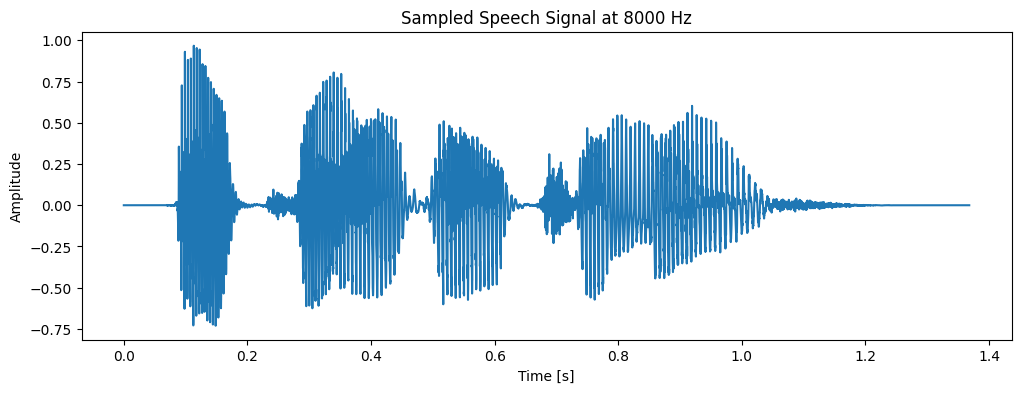

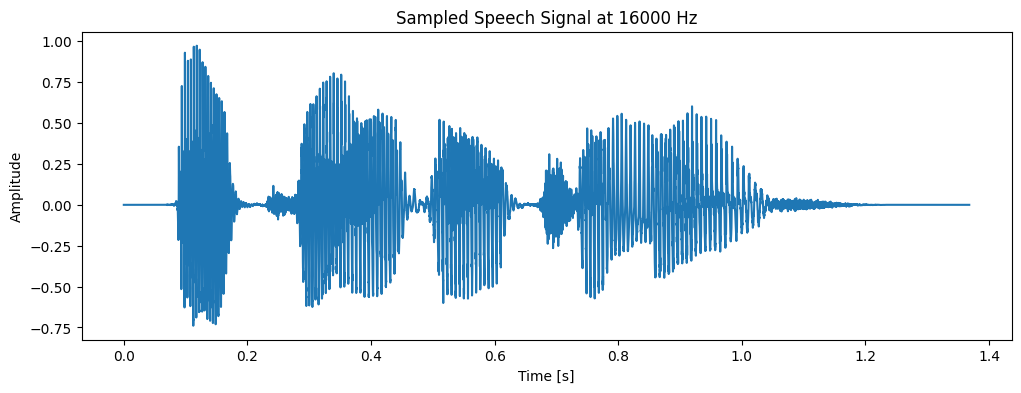

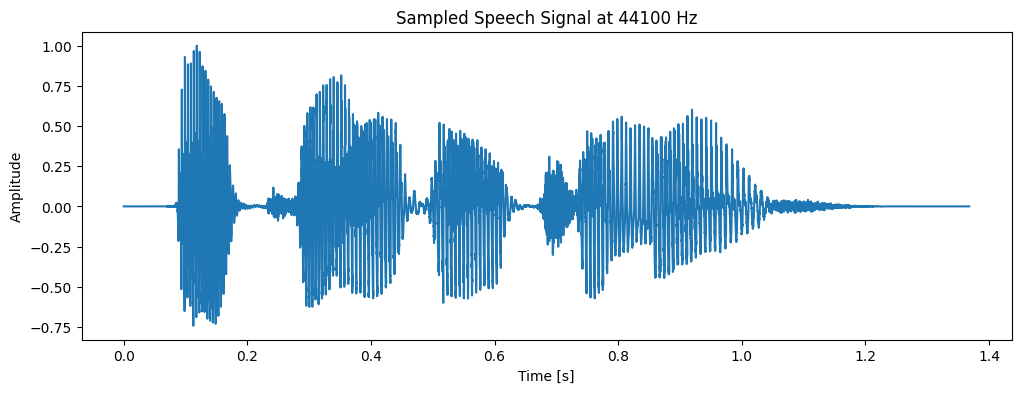

In [8]:
# Function to sample signal at different rates
def sample_signal(signal, original_rate, target_rate):
    factor = original_rate / target_rate
    indices = np.arange(0, len(signal), factor).astype(int)
    return signal[indices], np.arange(len(indices)) / target_rate

# Sampling rates
sampling_rates = [8000, 16000, 44100]
signals_sampled = []
time_vectors = []

# Plotting the sampled signals
for rate in sampling_rates:
    sampled_signal, time_sampled = sample_signal(signal, sample_rate, rate)
    signals_sampled.append(sampled_signal)
    time_vectors.append(time_sampled)
    plt.figure(figsize=(12, 4))
    plt.plot(time_sampled, sampled_signal)
    plt.title(f'Sampled Speech Signal at {rate} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()

#### (d) Using the sampled signals from the above task, reconstruct the signal using:
- Zero-order hold (nearest-neighbor interpolation)
- Linear interpolation

#### (e) Calculate the Mean Square Error (MSE) between the original and the reconstructed signals for both methods.

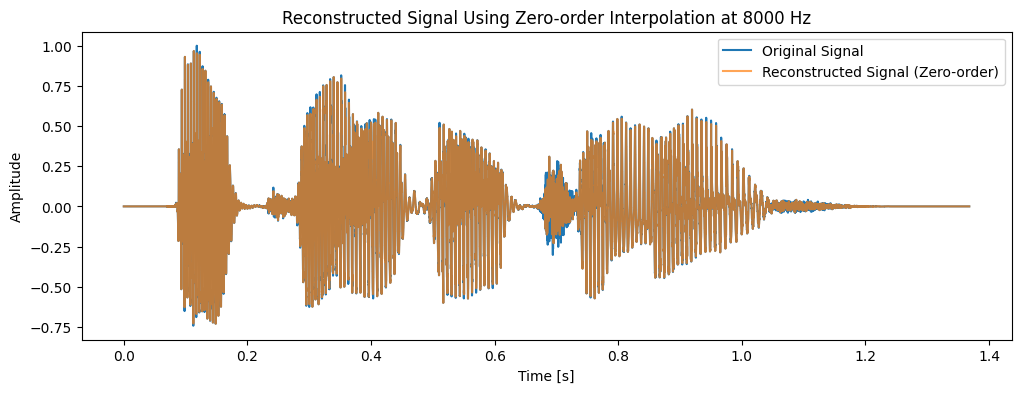

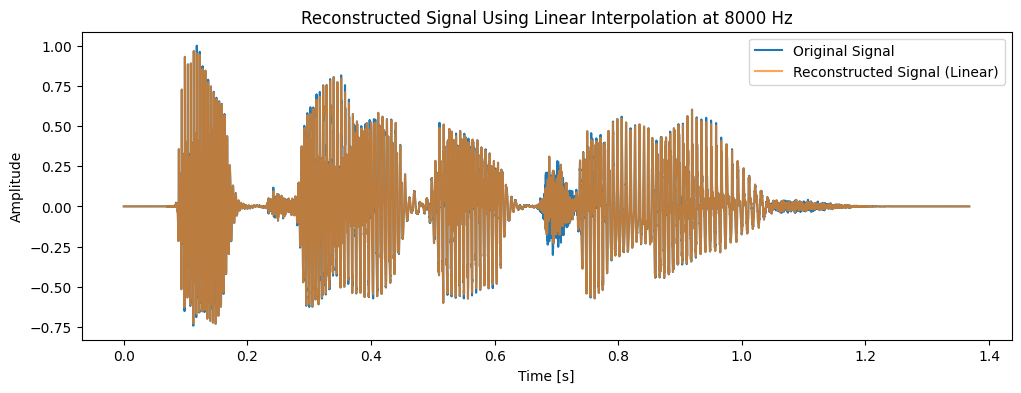

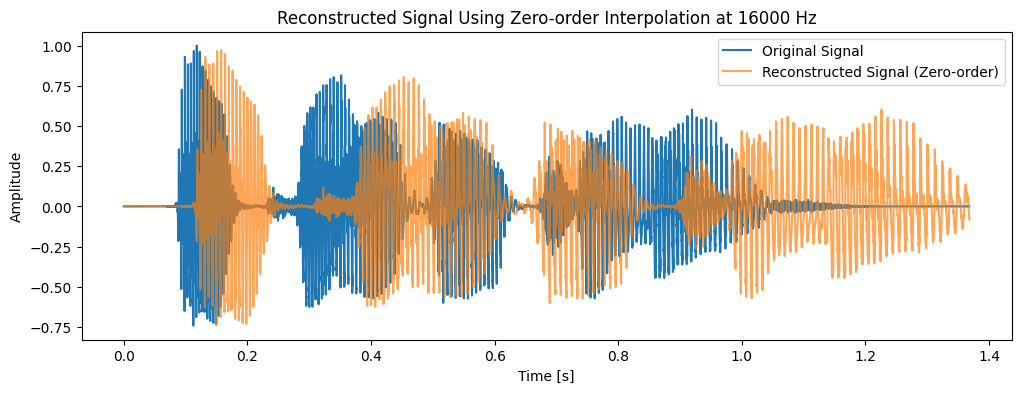

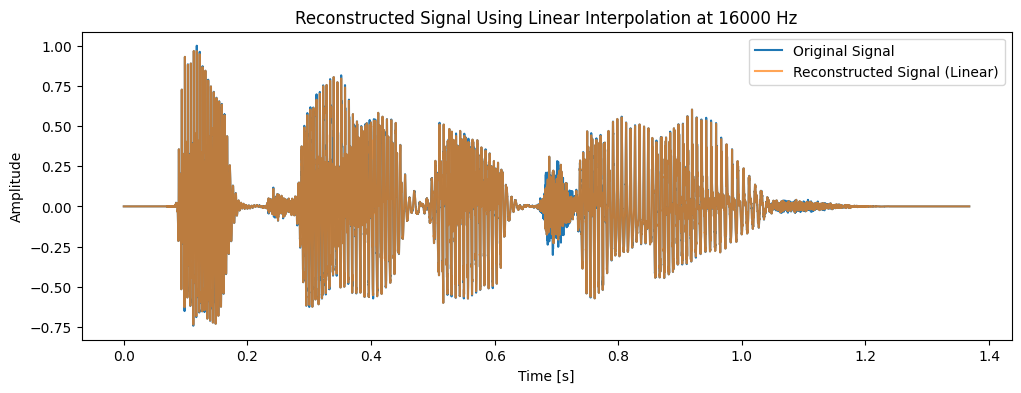

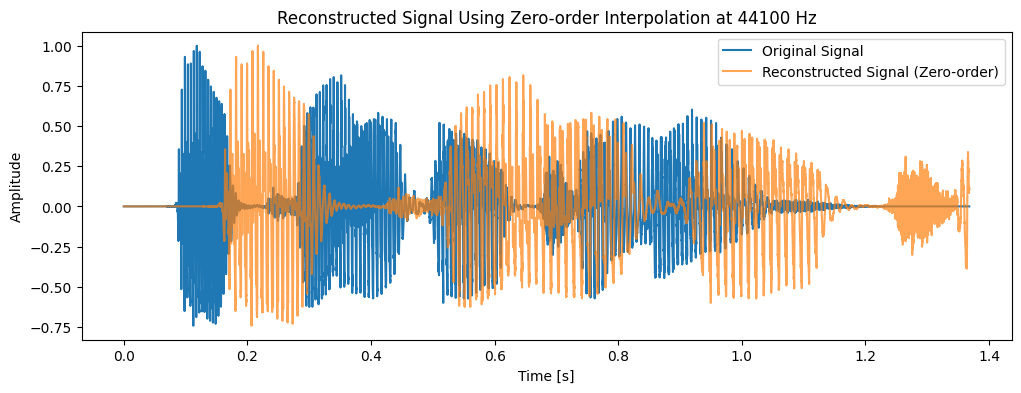

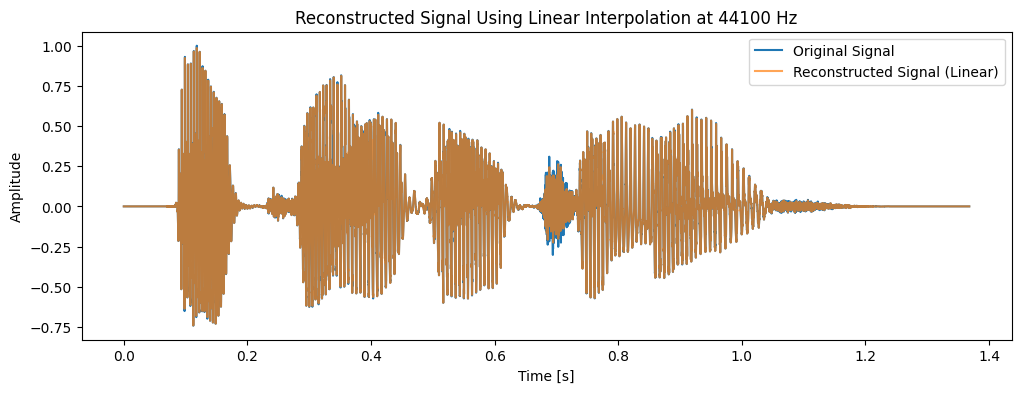

Sampling Rate: 8000 Hz
  Zero-order Hold MSE: 0.0013503795916756393
  Linear Interpolation MSE: 0.000569124957586628

Sampling Rate: 16000 Hz
  Zero-order Hold MSE: 0.09920117810573745
  Linear Interpolation MSE: 0.0002876710086823161

Sampling Rate: 44100 Hz
  Zero-order Hold MSE: 0.09525790442079028
  Linear Interpolation MSE: 0.0004328869215420878



In [18]:
# Reconstruction
def reconstruct_signal(time_sampled, sampled_signal, original_time, method):
    if method == 'zero-order':
        return np.repeat(sampled_signal, np.ceil(len(original_time) / len(sampled_signal)).astype(int))[:len(original_time)]
    elif method == 'linear':
        f = interp1d(time_sampled, sampled_signal, kind='linear', fill_value="extrapolate")
        return f(original_time)

# Plotting the reconstructed signals and calculating the mse
def reconstructed_plot(original_signal, reconstructed_signal, method, rate):
    plt.figure(figsize=(12, 4))
    plt.plot(time_original, original_signal, label='Original Signal')
    plt.plot(time_original, reconstructed_signal, label=f'Reconstructed Signal ({method})', alpha=0.7)
    plt.title(f'Reconstructed Signal Using {method} Interpolation at {rate} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    
    mse = np.mean((original_signal[:len(reconstructed_signal)] - reconstructed_signal) ** 2)
    return mse

mse_results = {}

for rate, sampled_signal, time_sampled in zip(sampling_rates, signals_sampled, time_vectors):
    # Zero-order hold reconstruction
    zero_order_reconstructed = reconstruct_signal(time_sampled, sampled_signal, time_original, 'zero-order')
    mse_zo = reconstructed_plot(signal, zero_order_reconstructed, 'Zero-order', rate)
    
    # Linear interpolation reconstruction
    linear_reconstructed = reconstruct_signal(time_sampled, sampled_signal, time_original, 'linear')
    mse_linear = reconstructed_plot(signal, linear_reconstructed, 'Linear', rate)
    
    mse_results[rate] = {'Zero-order MSE': mse_zo, 'Linear MSE': mse_linear}

for rate in mse_results:
    print(f"Sampling Rate: {rate} Hz")
    print(f"  Zero-order Hold MSE: {mse_results[rate]['Zero-order MSE']}")
    print(f"  Linear Interpolation MSE: {mse_results[rate]['Linear MSE']}\n")

### Inferences

As we know, speech signals lie between the range of 300 Hz and 3400 Hz. The highest frequency of the original speech signal can therefore be equal to 3400 Hz (approximately).
- Since the highest frequency can be 3400 Hz, a sampling rate of 8000 Hz still satisfies the Nyquist-Shannon sampling theorem and therefore perfect reconstruction is possible.
- Furthermore, sampling at 8kHz, 16kHz, and 44.1kHz, all give a MSE value that is negligible. My inference of the difference in the values is simply because of the noise present in the speech signal.
- Therefore, all the reconstructions are valid as all of them satisfy the Nyquist-Shannon sampling theorem.

Let us now validate the inferences by sampling at a rate much lower than 8kHz and reconstructing the signal,

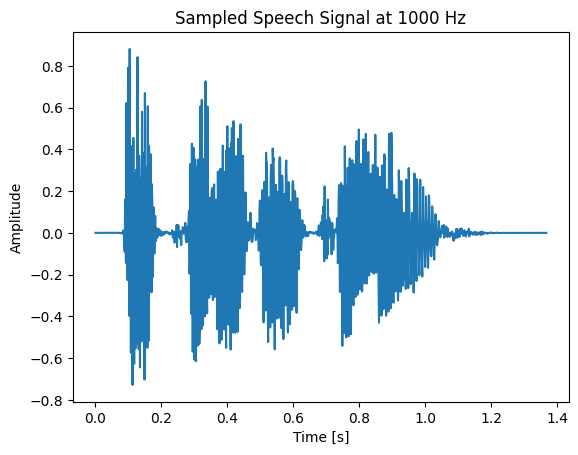

In [25]:
# Sampling at 7kHz
sampled_signal, time_sampled = sample_signal(signal, sample_rate, 800)
plt.plot(time_sampled, sampled_signal)
plt.title('Sampled Speech Signal at 1000 Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

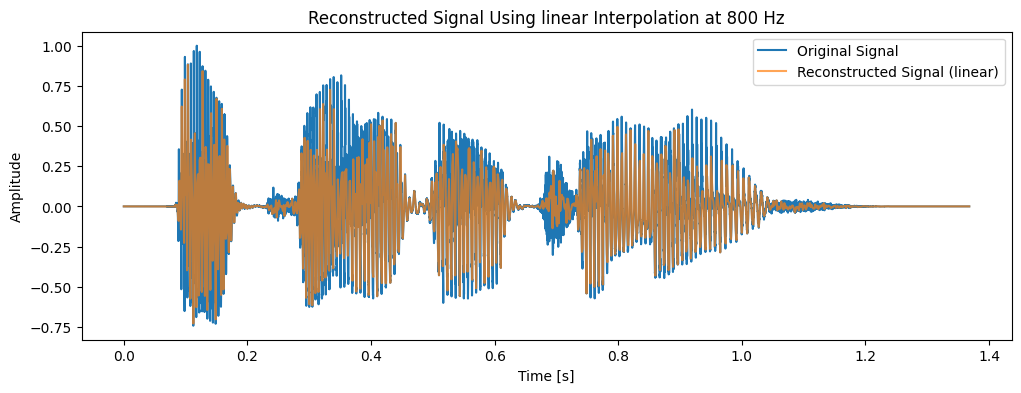

  Linear Interpolation MSE: 0.012997607512494047



In [26]:
# Reconstructing the signal
reconstructed_lower = reconstruct_signal(time_sampled, sampled_signal, time_original, 'linear')

mse_lower = reconstructed_plot(signal, reconstructed_lower, 'linear', 800)
print(f"  Linear Interpolation MSE: {mse_lower}\n")

Therefore, our hypothesis has been validated.

### Implement the source-filter model for a given speech signal and analyze the impact of sampling and reconstruction on the quality of the speech signal.

#### (a) Generate a synthetic speech signal using the source-filter model.
- Create a source signal (e.g., a glottal pulse train for voiced sounds or white noise for unvoiced sounds)
- Apply a filter that models the vocal tract, represented by an all-pole filter or an FIR filter with formants (resonances of the vocal tract).

#### (b) Plot the generated speech signal and analyze the effect of the filter on the original source.

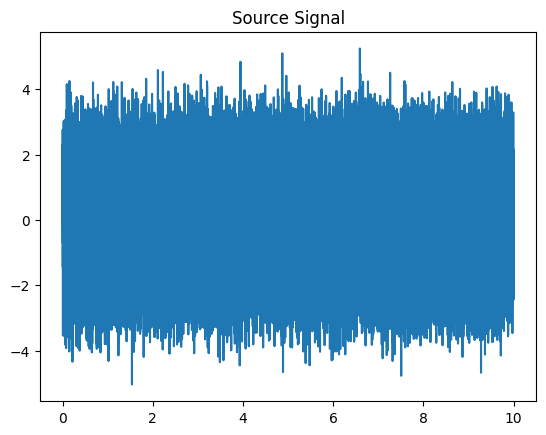

In [41]:
from scipy.signal import lfilter, firwin, resample

fs = 16000
duration = 10.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# For a voiced sound, the fundamental frequency will be 100 Hz
f0 = 100
voiced = np.sin(2 * np.pi * f0 * t)
unvoiced = np.random.randn(int(fs * duration))
source_signal = voiced + unvoiced

plt.plot(t, source_signal)
plt.title("Source Signal")
plt.show()

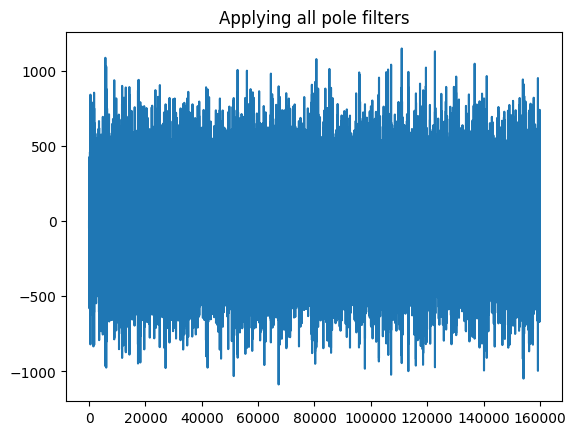

In [43]:
formants = [730, 1090, 2440]
bandwidths = [60, 90, 110]

# All-pole filter design
def all_pole_formant_filter(fs, formants, bandwidths):
    filters = []
    for f, bw in zip(formants, bandwidths):
        # Pole radius
        r = np.exp(-np.pi * bw / fs)
        # Pole angle (based on frequency)
        theta = 2 * np.pi * f / fs
        # Second-order filter coefficients for each formant
        a = np.array([1, -2 * r * np.cos(theta), r ** 2])
        filters.append(a)
    return filters

# Apply all-pole filter to the source
def apply_all_pole_filter(source, filters):
    output = source.copy()
    for a in filters:
        output = lfilter([1], a, output)
    return output

# All-pole filter for the formants
all_pole_filters = all_pole_formant_filter(fs, formants, bandwidths)
speech_all_pole = apply_all_pole_filter(source_signal, all_pole_filters)

plt.plot(speech_all_pole)
plt.title("Applying all pole filters")
plt.show()

Analyzing the effect:

From the time-domain, it is clearly visible how the shape of the signal is being changed. However, to actually analyze the effects of the filter, we must look at the signal in the frequency domain,

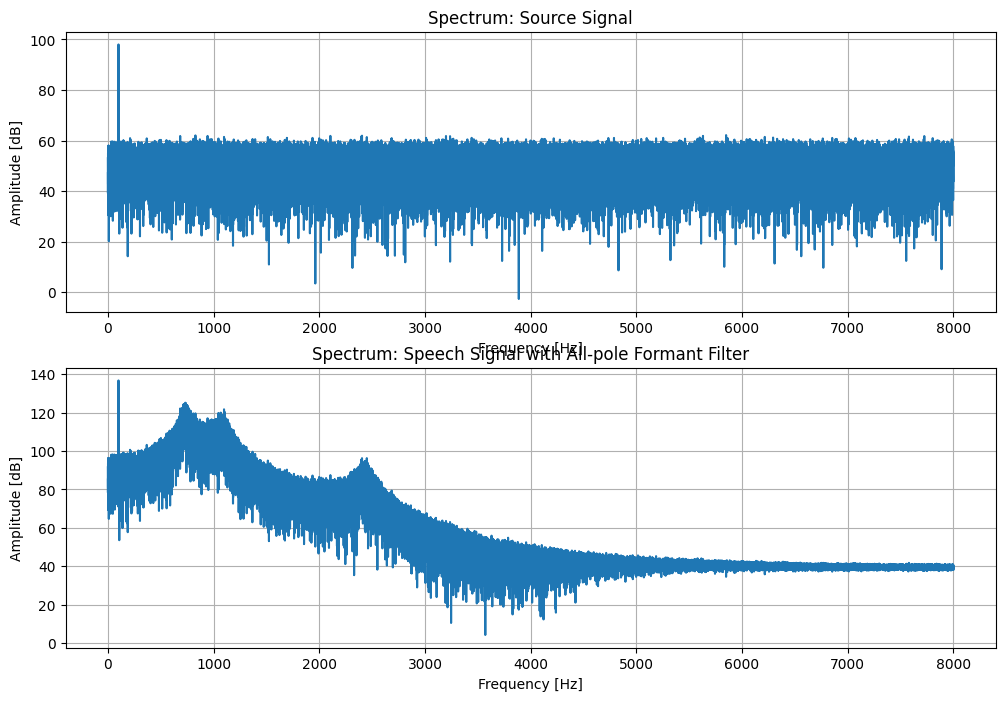

In [47]:
from scipy.fftpack import fft

# Plot the spectrum of a signal
def plot_spectrum(signal, fs, title):
    freqs = np.fft.rfftfreq(len(signal), 1/fs)
    spectrum = np.abs(np.fft.rfft(signal))
    plt.plot(freqs, 20 * np.log10(spectrum))
    plt.title(f'Spectrum: {title}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()
    
# Frequency domain plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plot_spectrum(source_signal, fs, "Source Signal")

plt.subplot(2, 1, 2)
plot_spectrum(speech_all_pole, fs, "Speech Signal with All-pole Formant Filter")

The source signal was rich in harmonics, but after filtering, certain frequencies are amplified, while other are attenuated. Specifically, the frequencies corresponding to the formants are peaking.

#### (c) Sample the speech signal generated in the above task at different sampling rates (e.g., 8 kHz, 16 kHz, 44.1 kHz).

#### (d) Reconstruct the signal using a suitable interpolation method.

#### (e) Compute the MSE between the original and reconstructed speech signals.

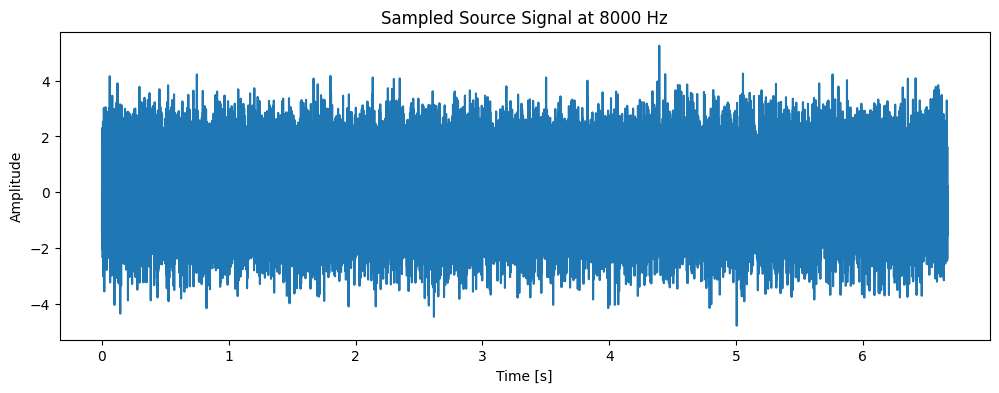

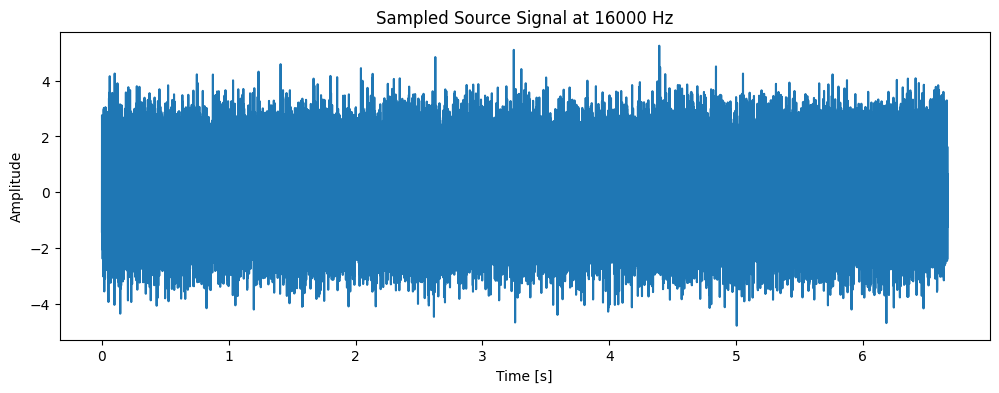

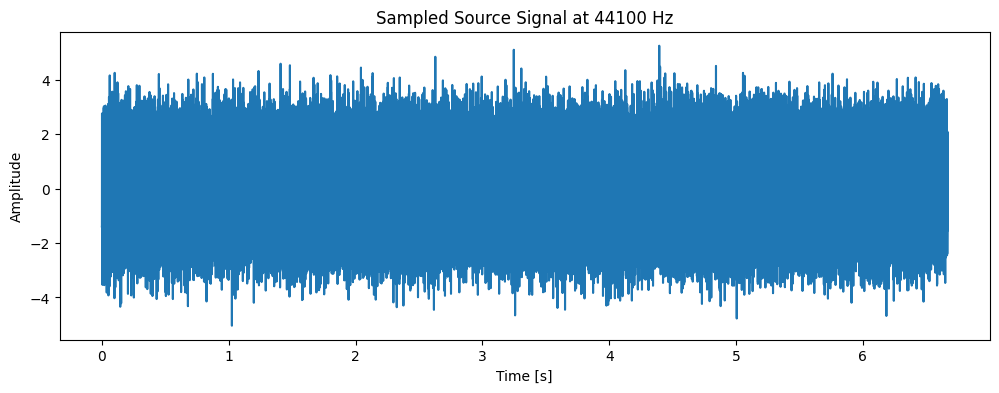

In [48]:
# Sampling rates
sampling_rates = [8000, 16000, 44100]
signals_sampled = []
time_vectors = []

# Plotting the sampled signals
for rate in sampling_rates:
    sampled_signal, time_sampled = sample_signal(source_signal, sample_rate, rate)
    signals_sampled.append(sampled_signal)
    time_vectors.append(time_sampled)
    plt.figure(figsize=(12, 4))
    plt.plot(time_sampled, sampled_signal)
    plt.title(f'Sampled Source Signal at {rate} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()

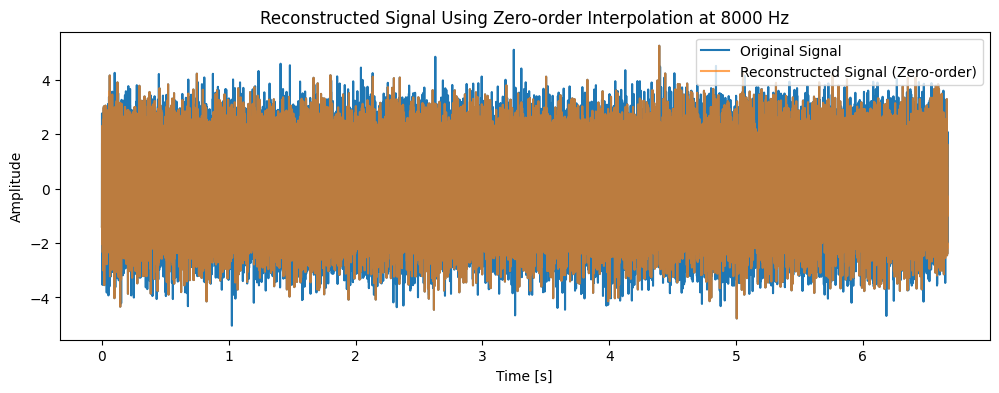

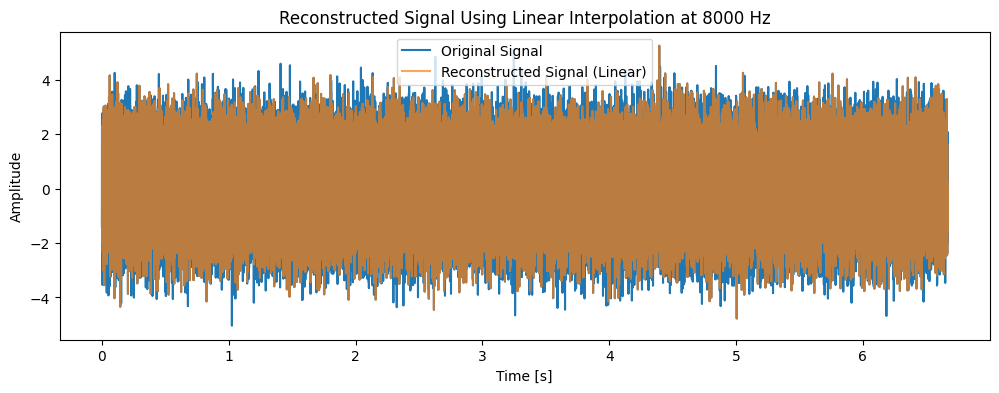

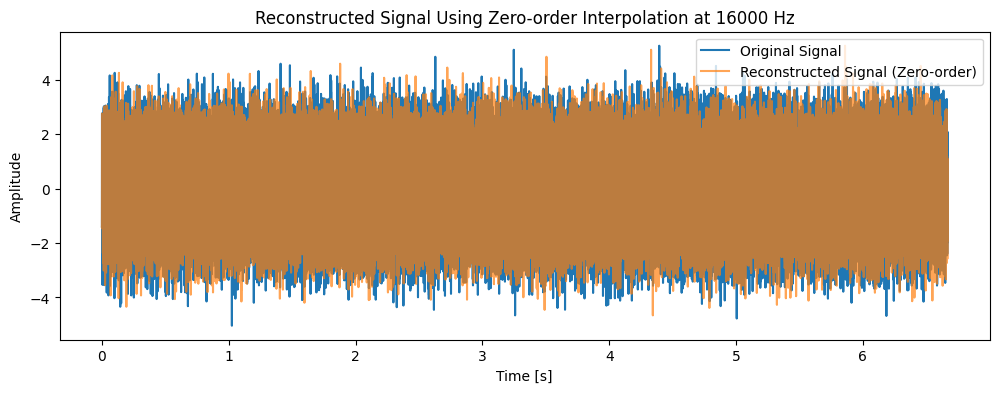

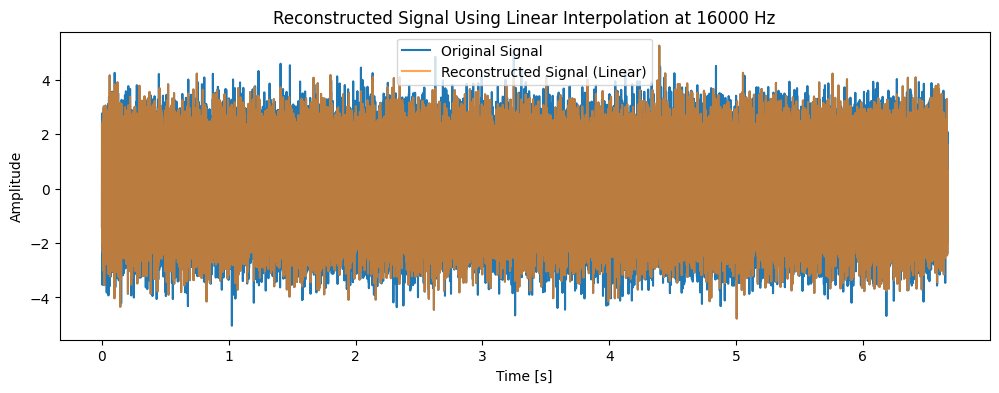

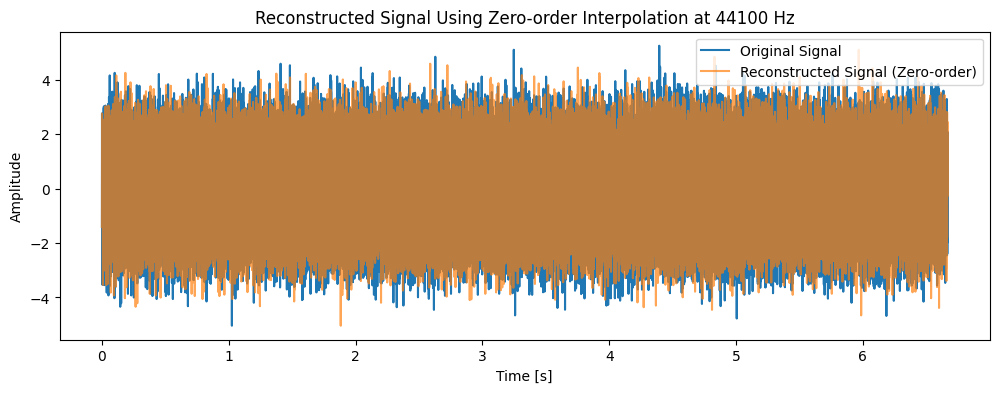

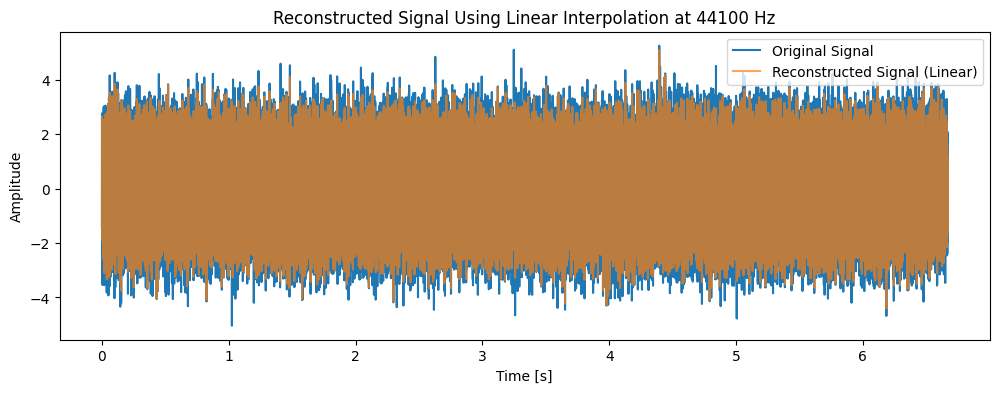

Sampling Rate: 8000 Hz
  Zero-order Hold MSE: 1.333875442698401
  Linear Interpolation MSE: 1.0342337979565894

Sampling Rate: 16000 Hz
  Zero-order Hold MSE: 2.9908287240060845
  Linear Interpolation MSE: 0.5887935153382274

Sampling Rate: 44100 Hz
  Zero-order Hold MSE: 2.9924488439207737
  Linear Interpolation MSE: 0.6526825673609685



In [50]:
mse_results = {}
time_original = np.arange(len(source_signal)) / sample_rate

for rate, sampled_signal, time_sampled in zip(sampling_rates, signals_sampled, time_vectors):
    # Zero-order hold reconstruction
    zero_order_reconstructed = reconstruct_signal(time_sampled, sampled_signal, time_original, 'zero-order')
    mse_zo = reconstructed_plot(source_signal, zero_order_reconstructed, 'Zero-order', rate)
    
    # Linear interpolation reconstruction
    linear_reconstructed = reconstruct_signal(time_sampled, sampled_signal, time_original, 'linear')
    mse_linear = reconstructed_plot(source_signal, linear_reconstructed, 'Linear', rate)
    
    mse_results[rate] = {'Zero-order MSE': mse_zo, 'Linear MSE': mse_linear}

for rate in mse_results:
    print(f"Sampling Rate: {rate} Hz")
    print(f"  Zero-order Hold MSE: {mse_results[rate]['Zero-order MSE']}")
    print(f"  Linear Interpolation MSE: {mse_results[rate]['Linear MSE']}\n")

### Inferences

Again, the inferences for the sampling rates and reconstruction remain the same. However, we saw something new with the source filter model where applying a filter that models vocal tract can shape the signal in a certain fashion. This is exactly how we speak i.e., first the raw speech is generated which is later filtered by our vocal cords to increase certain frequencies resulting in formation of meaningful words and sounds.

# End